In [268]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "Arial Unicode MS"


In [269]:
# Uvoz knjižnice
import pandas as pd

# Branje CSV datoteke
knjige = pd.read_csv('knjige1.csv', encoding='utf-8')

# Nastavimo, da se pri izpisu prikaže največ 20 vrstic
pd.options.display.max_rows = 20

# Pretvorba stolpcev v številčne vrednosti
knjige["ocena"] = pd.to_numeric(knjige["ocena"], errors="coerce").fillna(0)
knjige["stevilo_ocen"] = pd.to_numeric(knjige["stevilo_ocen"], errors="coerce").fillna(0).astype(int)
knjige["want_to_read"] = pd.to_numeric(knjige["want_to_read"], errors="coerce").fillna(0).astype(int)
knjige["prva_izdaja"] = pd.to_numeric(knjige["prva_izdaja"], errors="coerce").fillna(0).astype(int)
knjige["stevilo_izdaj"] = pd.to_numeric(knjige["stevilo_izdaj"], errors="coerce").fillna(0).astype(int)

# Izpišemo tabelo prvih 20 knjig, da vidimo, kako se nam izpišejo podatki
knjige.head(20)


,naslov,avtor,ocena,stevilo_ocen,want_to_read,prva_izdaja,stevilo_izdaj
0,W.B. Yeats,William Butler Yeats,4.20,15,172,1895,135
1,A B C Murders,Agatha Christie,4.11,54,973,1936,132
2,The Annotated Charlotte's Web,E. B. White,4.03,399,0,1952,149
3,The souls of black folk,W. E. B. Du Bois,4.00,8,239,1903,412
4,Finnegans wake: a facsimile of Buffalo noteboo...,James Joyce,3.58,12,121,1928,128
5,Art of poetry,"Aristotle,Leon Golden, andO. B. Hardison",3.86,7,261,1536,251
6,The B.F.G.,Roald Dahl,4.18,130,0,1980,136
7,The Elements of Style,"William Strunk, Jr.,E. B. White,William Strunk...",3.62,13,331,1920,273
8,"The Norton Anthology of English Literature, Th...","M. H. Abrams,M. Abrams,M. H. Adams,Stephen Gre...",4.00,4,203,1962,244
9,The alchemist. A comedy. Acted in the year 161...,Ben Jonson,4.19,27,449,1612,128


In [270]:

# Število vseh knjig
st_knjig = len(knjige)
print(st_knjig)


10940


Spodaj bomo definirali knjige_10, kar nam bo podalo le knjige z več kot 10 ocenami.
To nam bo pomagalo pri nadaljni analizi, kjer bomo želeli imeti le knjige z dovolj veliko ocenami, da bodo naše ugotovitve bolj točne.
Prepričati se moramo da je takih knjig dovolj. 

In [271]:

# Knjige z vec kot 10 ocenami
knjige_10 = knjige[knjige["stevilo_ocen"] > 10]
print(len(knjige_10))


963


In [272]:

# Povprecna ocena
povprecna_ocena = knjige_10["ocena"].mean()
print(povprecna_ocena)


3.962915299480789


In [273]:

#Najvisja in najnizja ocena
najnizja = knjige_10.loc[knjige_10["ocena"].idxmin()]
najvisja = knjige_10.loc[knjige_10["ocena"].idxmax()]

print(najnizja)
print(najvisja)


naslov           Hannibal Rising
avtor              Thomas Harris
ocena                       2.76
stevilo_ocen                  17
want_to_read                  89
prva_izdaja                 2006
stevilo_izdaj                 22
Name: 1355, dtype: object
naslov           Empire of Storms (B&N Exclusive Edition) (Thro...
avtor                                                Sarah J. Maas
ocena                                                         4.94
stevilo_ocen                                                    16
want_to_read                                                   200
prva_izdaja                                                   2016
stevilo_izdaj                                                   24
Name: 1056, dtype: object


In [274]:

# Število vseh ocen
st_vseh_ocen = knjige["stevilo_ocen"].sum()
print(st_vseh_ocen)


55870


In [275]:

#Povprecen "want-to-read"
povprecen_want_to_read = knjige["want_to_read"].mean().round(2)
print(povprecen_want_to_read)


34.14


In [276]:

#Knjige z najvisjo oceno
knjige_razvrscene = knjige_10.sort_values(by="ocena", ascending=False)

knjige_razvrscene.head(20)


,naslov,avtor,ocena,stevilo_ocen,want_to_read,prva_izdaja,stevilo_izdaj
1056,Empire of Storms (B&N Exclusive Edition) (Thro...,Sarah J. Maas,4.94,16,200,2016,24
465,Frog and Toad Are Friends,Arnold Lobel,4.92,12,218,1920,73
1727,"Mistborn Trilogy: The Final Empire, the Well o...",Brandon Sanderson,4.91,11,119,2001,10
929,Junie B. Jones Is a Party Animal (Junie B. Jon...,Barbara ParkandDenise Brunkus,4.82,11,71,1979,9
1736,The Happiest Man on Earth,Eddie Jaku,4.81,16,204,2020,10
1627,The Pigeon Finds a Hot Dog!,Mo Willems,4.81,31,161,2004,13
1491,The Guest List: A Novel,Lucy FoleyandVictoria Horrillo Ledesma,4.77,13,312,2020,17
902,Prisoner B-3087,Alan Gratz,4.76,21,314,2013,2
1877,"Defy Me: The Shatter Me Series, book 5",Tahereh Mafi,4.73,15,391,2019,6
1940,Fantasia: Het Vlammenravijn,"Elisabetta Dami,Danilo Barozzi,Julia Heim, and...",4.73,11,73,2009,8


In [277]:

# Top 10 want-to-read knjig
top10_wtr = knjige.sort_values("want_to_read", ascending=False)
top10_wtr.head(10)


,naslov,avtor,ocena,stevilo_ocen,want_to_read,prva_izdaja,stevilo_izdaj
250,The Count of Monte Cristo,Alexandre Dumas,4.31,178,995,1830,732
46,El juego de Ender,Orson Scott Card,4.36,388,991,1985,104
801,Influence: how and why people agree to things,Robert B. Cialdini,3.92,59,990,1983,24
36,Prestuplenie i nakazanie: roman b shesti chast...,Фёдор Михайлович Достоевский,4.20,101,979,1866,409
1751,the sun and her flowers,Rupi Kaur,4.07,42,978,2017,9
1,A B C Murders,Agatha Christie,4.11,54,973,1936,132
654,Because of Winn-Dixie,Kate DiCamillo,4.21,92,952,2000,55
264,Adventures of Huckleberry Finn,Mark Twain,3.83,212,939,1876,2552
83,Secret Garden. Livello B1. 1. Con CD-ROM,Frances Hodgson Burnett,3.89,75,935,1911,1594
755,Gone Girl,Gillian Flynn,3.64,55,934,2011,48


In [278]:

# Število knjig na avtorja
st_knjig_na_avtorja = knjige["avtor"].value_counts().head(10)
print(st_knjig_na_avtorja)


avtor
United States. Congress. House                 780
United States. Congress. House. Committe...    450
Unknown author                                 221
Betty Neels                                    106
Agatha Christie                                 80
William Shakespeare                             52
Mildred Augustine Wirt Benson                   52
United States. Congress. Senate. Committ...     51
James Patterson                                 44
Berndtson & Berndtson                           42
Name: count, dtype: int64


In [279]:

# Povprecna ocena na avtorja
povprecna_ocena_na_avtorja = knjige_10.groupby("avtor")["ocena"].mean().sort_values(ascending=False).head(10)
print(povprecna_ocena_na_avtorja)


avtor
Sarah J. Maas                                                4.94
Barbara ParkandDenise Brunkus                                4.82
Eddie Jaku                                                   4.81
Lucy FoleyandVictoria Horrillo Ledesma                       4.77
Alan Gratz                                                   4.76
Tahereh Mafi                                                 4.73
Elisabetta Dami,Danilo Barozzi,Julia Heim, andDavid Nel·lo   4.73
Romney Marshall, B., and Paul Jhon Stein...                  4.67
刘慈欣andJoel Martinsen                                         4.65
Julie GarwoodandSusan Duerden                                4.64
Name: ocena, dtype: float64


In [280]:

# Najbolje ocenjene knjige v zadnjih 10-ih letih
novejse_knjige = knjige_10[knjige_10["prva_izdaja"] >= 2015].sort_values("ocena", ascending=False)
novejse_knjige.head(10)


,naslov,avtor,ocena,stevilo_ocen,want_to_read,prva_izdaja,stevilo_izdaj
1056,Empire of Storms (B&N Exclusive Edition) (Thro...,Sarah J. Maas,4.94,16,200,2016,24
1736,The Happiest Man on Earth,Eddie Jaku,4.81,16,204,2020,10
1491,The Guest List: A Novel,Lucy FoleyandVictoria Horrillo Ledesma,4.77,13,312,2020,17
1877,"Defy Me: The Shatter Me Series, book 5",Tahereh Mafi,4.73,15,391,2019,6
1957,Arcanum Unbounded: The Cosmere Collection: the...,Brandon Sanderson,4.69,16,58,2016,13
838,Getaway (Diary of a Wimpy Kid Book 12) (Exclus...,Jeff Kinney,4.66,59,819,2017,39
1512,Oathbringer: The Stormlight Archive Book Three,Brandon Sanderson,4.57,83,198,2017,16
1330,Shoe Dog: A Memoir by the Creator of Nike,Phil Knight,4.53,45,661,2016,23
1435,The Hollow Boy,Jonathan Stroud,4.50,12,123,2015,19
3387,The Raven Tower,Ann Leckie,4.47,15,37,2019,8


In [281]:

# Najstarejše knjige

# Uporabimo le knjige, za katere imamo podano leto izdaje
knjige_veljavne1 = knjige[knjige["prva_izdaja"] > 0].copy()

knjige_po_letih = knjige_veljavne1.sort_values("prva_izdaja")
knjige_po_letih.head(10)[["naslov", "avtor", "prva_izdaja", "ocena"]]


,naslov,avtor,prva_izdaja,ocena
816,Two years before the mast: a personal narrativ...,Richard Henry Dana,1000,4.25
5064,The new psalter of the Roman breviary: text an...,Catholic Church,1200,0.00
175,The Holy Bible: containing the Old and New Tes...,Bible,1200,3.94
587,"De civitate dei, libri XXII",Augustine of Hippo,1440,3.50
1388,Tully's offices: in three books,Cicero,1465,0.00
120,C. Plini Secundi naturalis historiae libri XXX...,Pliny the Elder,1469,4.33
482,Mishneh Torah leha-Rambam: hilkhot ʻavadim,Moses Maimonides,1470,4.00
2196,Justin's history of the world from the Assyria...,"Marcus Junianus Justinus,Justin, andWaldemar H...",1470,3.50
1621,De vita Caesarum: libri VIII,SuetoniusandR. E. J. Fitzpatrick,1470,0.00
3549,De finibus bonorum et malorum,Cicero,1471,4.00


In [282]:

# Število knjig po številu izdaj
knjige_izdaje = knjige[knjige["stevilo_izdaj"] > 0] # izpustimo knjige, ki nimajo podatka o številu izdaj
st_knjig_po_st_izdaj = knjige_izdaje["stevilo_izdaj"].value_counts().sort_index().astype(int)
print(st_knjig_po_st_izdaj)

stevilo_izdaj
2       632
3       377
4       250
5       178
6       150
       ... 
2850      1
3005      1
3172      1
3546      1
4036      1
Name: count, Length: 462, dtype: int64


Sedaj bomo podatke o ocenah, številu ocen in številu "want to read" prikazali bolj grafično in poskusili
poiskati povezavo med njimi.
Ogledali si bomo:
- kakšna je povezava med ocenami in številom le-teh ocen,
- koliko knjig ima določeno število ocen (ugotovili bomo, koliko je knjig z zelo malo oz. zelo veliko ocenami),
- kako število ocen na knjigo vpliva na njeno povprečno oceno (z razpršenim diagramom),
- kako število "want to read" na knjigo vpliva na njeno povprečno oceno (z razpršenim diagramom),
- kako močno sta povezana število ocen in število "want to read" s pomočjo Pearsonovega korelacijskega koeficienta.

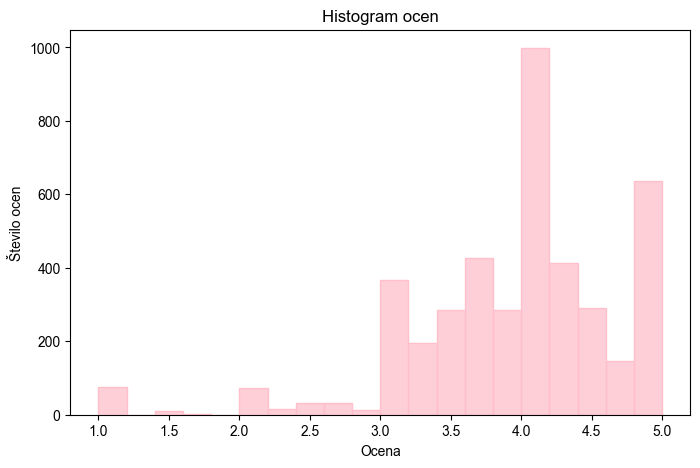

In [283]:

# Histogram števila ocen
ocena_poz = knjige["ocena"][knjige["ocena"] > 0] # Znebimo se knjig brez podatkov o oceni

plt.figure(figsize=(8,5))
sns.histplot(ocena_poz, bins = 20, color="pink", edgecolor = "pink")
plt.title("Histogram ocen")
plt.xlabel("Ocena")
plt.ylabel("Število ocen")
plt.show()

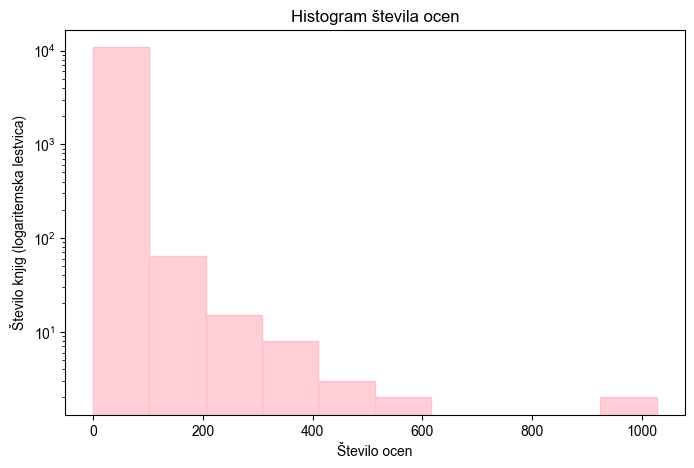

In [284]:
# Histogram števila ocen
plt.figure(figsize=(8,5))
sns.histplot(knjige["stevilo_ocen"].dropna(), bins=10, color="pink", edgecolor="pink")
plt.title("Histogram števila ocen")
plt.xlabel("Število ocen")


# Pri prikazu histograma ocen, smo os y nastavlili na logritmično lestvico.
# To naredimo zato, ker je porazdelitev števila ocen dokaj nesimetrična, 
# veliko knjig ima zelo malo ocen, medtem ko ima nekaj knjig kar veliko ocen.
# Z logaritmično lestvico se majhne in velike vrednosti bolje prikažejo skupaj,
# saj logaritmiranje kompresira visoke vrednosti in razširi nizke vrednosti. 
plt.yscale("log")
plt.ylabel("Število knjig (logaritemska lestvica)")

plt.show()

Sedaj si bomo s pomočjo razpršenih diagramov ogledali, kako število ocen in število "want to read"
vplivata na povprečno oceno knjige.

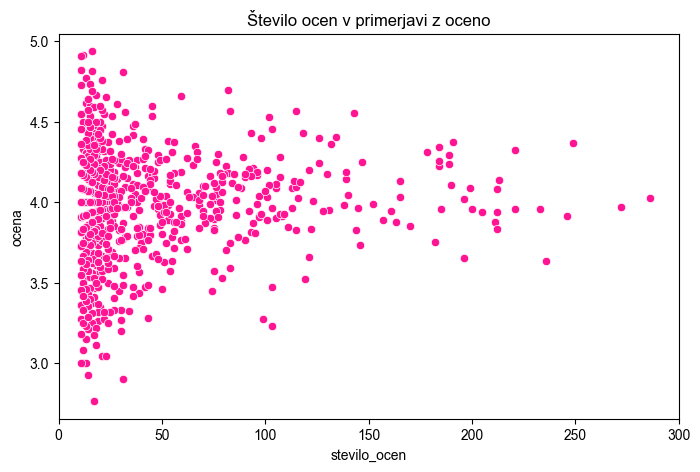

In [285]:
# Raztresen diagram: število ocen v primerjavi s povprečno oceno
plt.figure(figsize=(8,5))
sns.scatterplot(x = "stevilo_ocen", y = "ocena", data = knjige_10, color = "deeppink")
plt.title("Število ocen v primerjavi z oceno")
plt.xlim(0, 300)
plt.show()



Opazka: iz grafa lahko opazimo, da imajo knjige z malo ocen širši razpon ocen,
ko se število ocen povečuje, pa se interval ocen postopoma zožuje, kar pomeni,
da se povprečne ocene ujemajo bolj dosledno in razpršenost ocen se manjša.

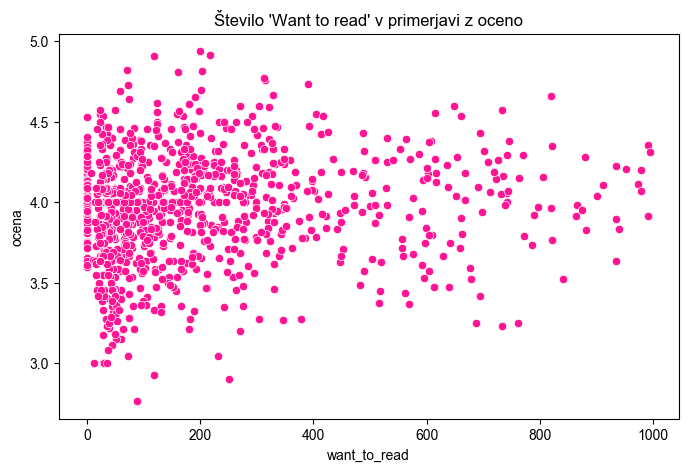

In [286]:
# Raztresen diagram: Število "Want to read" v primerjavi z oceno
plt.figure(figsize=(8,5))
sns.scatterplot(
    x = "want_to_read", 
    y = "ocena",
    data = knjige_10,
    color = "deeppink")
plt.title("Število 'Want to read' v primerjavi z oceno")
plt.show()



Opazka: opazimo, da se zgodi podobno kot pri prejšnjem grafu, kar se tiče razpršitve, vendar hkrati lahko opazimo, 
da imajo dokaj visok "want to read" tudi knjige, ki nimajo tako visoke ocene.

Število ocen v odvisnosti od "Want to read":

Pearsonov korelacijski koeficient med številom ocen in "want to read" nam pove,
kako močno linearno sta ti dve spremenljivki povezani. 
Pozitivna vrednost pomeni, da knjige z več ocenami običajno želijo prebrati več uporabnikov.

In [287]:
# Število ocen v odvisnosti od "Want to read"

# Pearsonov korelacijski koeficient
povezava_st_ocen_wtr = knjige["stevilo_ocen"].corr(knjige["want_to_read"])

print("Povezava:", povezava_st_ocen_wtr)

Povezava: 0.3271236074530274


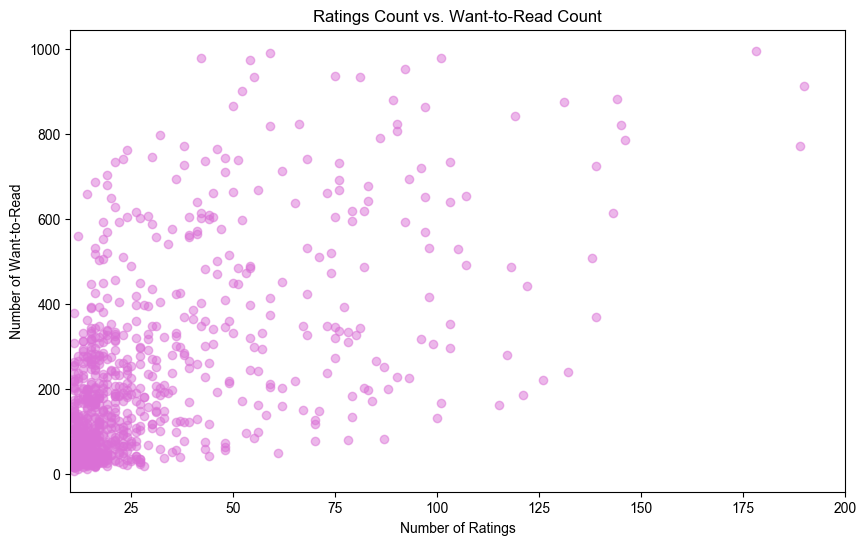

In [288]:
# Grafični prikaz števila "want to read" v odvisnosti od števila ocen knjig.

plt.figure(figsize=(10,6))
knjige_veljavne3 = knjige_10[knjige_10["want_to_read"] > 0] # vzamemo knjige z dovolj veliko ocenami, ki imajo podatke o "want to read"
plt.scatter(knjige_veljavne3["stevilo_ocen"], knjige_veljavne3["want_to_read"], alpha=0.5, color = "orchid")

plt.title("Ratings Count vs. Want-to-Read Count")
plt.xlabel("Number of Ratings")
plt.xlim(10, 200)
plt.ylabel("Number of Want-to-Read")
plt.show()




Knjige z več ocenami imajo tudi večji "want to read", ampak povezava ni zelo močna,
torej izjeme vseeno obstajajo.
Tudi iz grafa lahko opazimo, da med tema dvema vrednostima ni zelo močne povezave, saj 
obstajajo knjige, ki imajo dokaj malo ocen, ki jih kljub temu želi prebrati veliko ljudi.

In [289]:
# Najbolj ocenjene knjige
najbolj_ocenjene = knjige.sort_values("stevilo_ocen", ascending = False)
najbolj_ocenjene.head(10)

,naslov,avtor,ocena,stevilo_ocen,want_to_read,prva_izdaja,stevilo_izdaj
657,De 48 wetten van de macht,Robert Greene,4.04,1027,0,1998,55
38,"Rich Dad, Poor Dad B Special",Robert T. KiyosakiandSharon L. Lechter,4.00,1001,0,1990,115
235,Harry Potter and the Prisoner of Azkaban,J. K. Rowling,4.27,583,0,1999,262
251,Animal Farm,George Orwell,4.14,515,0,1945,414
220,The Hobbit,J.R.R. Tolkien,4.28,462,0,1937,460
99,The Hunger Games,Suzanne Collins,4.10,460,0,2008,131
337,Harry Potter and the Chamber of Secrets,J. K. Rowling,4.20,435,0,1998,276
2,The Annotated Charlotte's Web,E. B. White,4.03,399,0,1952,149
292,Harry Potter und die Heiligtümer des Todes,J. K. Rowling,4.28,391,0,2007,126
46,El juego de Ender,Orson Scott Card,4.36,388,991,1985,104


Prej smo si ogledali najbolje ocenjene knjige v zadnjih 10-ih letih, sedaj pa si bomo ogledali
najbolje ocenjene knjige vseh časov.
Vzeli bomo samo podatke za knjige, z več kot 10 ocenami.

In [290]:
# Najbolje ocenjene knjige z več kot 10 ocenami
najbolje_ocenjene = knjige_10.sort_values("ocena", ascending=False)
najbolje_ocenjene.head(10)

,naslov,avtor,ocena,stevilo_ocen,want_to_read,prva_izdaja,stevilo_izdaj
1056,Empire of Storms (B&N Exclusive Edition) (Thro...,Sarah J. Maas,4.94,16,200,2016,24
465,Frog and Toad Are Friends,Arnold Lobel,4.92,12,218,1920,73
1727,"Mistborn Trilogy: The Final Empire, the Well o...",Brandon Sanderson,4.91,11,119,2001,10
929,Junie B. Jones Is a Party Animal (Junie B. Jon...,Barbara ParkandDenise Brunkus,4.82,11,71,1979,9
1736,The Happiest Man on Earth,Eddie Jaku,4.81,16,204,2020,10
1627,The Pigeon Finds a Hot Dog!,Mo Willems,4.81,31,161,2004,13
1491,The Guest List: A Novel,Lucy FoleyandVictoria Horrillo Ledesma,4.77,13,312,2020,17
902,Prisoner B-3087,Alan Gratz,4.76,21,314,2013,2
1877,"Defy Me: The Shatter Me Series, book 5",Tahereh Mafi,4.73,15,391,2019,6
1940,Fantasia: Het Vlammenravijn,"Elisabetta Dami,Danilo Barozzi,Julia Heim, and...",4.73,11,73,2009,8


Sedaj bomo naredili analizo avtorjev.
Ugotovili bomo:
- kateri avtorji so najbolje izdajani,
- kateri avtorji so najbolje ocenjeni,
- kateri avtorji so najbolj popularni (s pomočjo podatkov o številu "want to read" za vsakega izmed avtorjev).

Bolj natančna in zanimiva analiza avtorjev pa pride še na koncu, saj bomo do takrat pridobili še nekatere podatke, ki 
jih do sedaj še nimamo.

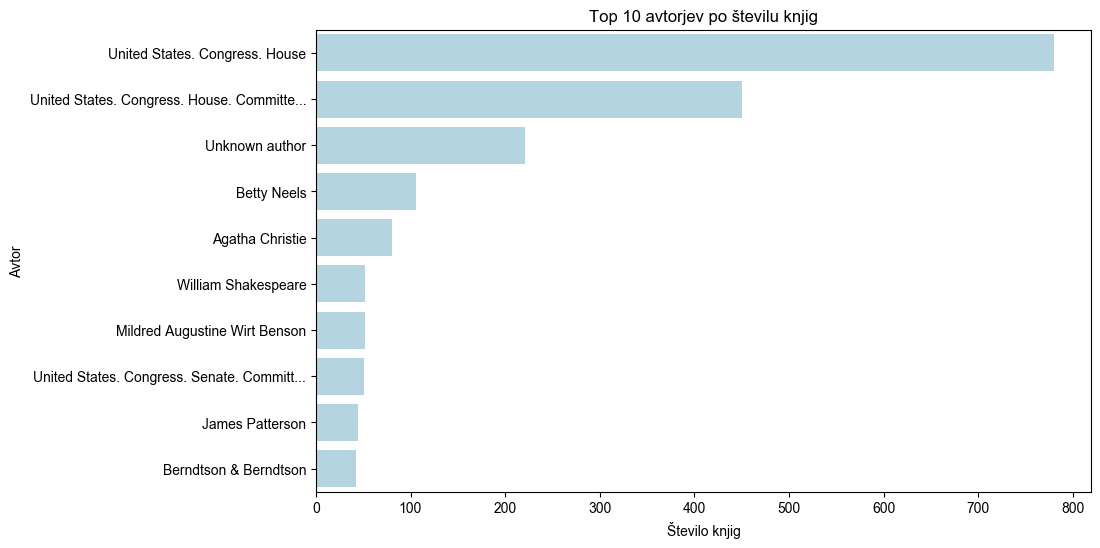

In [291]:
# Najbolj izdajani avtorji

top10_avtorjev = st_knjig_na_avtorja.head(10) # izberemo 10 avtorjev z največjim številom knjig

# Narišemo graf
plt.figure(figsize=(10,6))
sns.barplot(
    x = top10_avtorjev.values,
    y = top10_avtorjev.index,
    color = "lightblue"
)
plt.title("Top 10 avtorjev po številu knjig")
plt.xlabel("Število knjig")
plt.ylabel("Avtor")
plt.show()

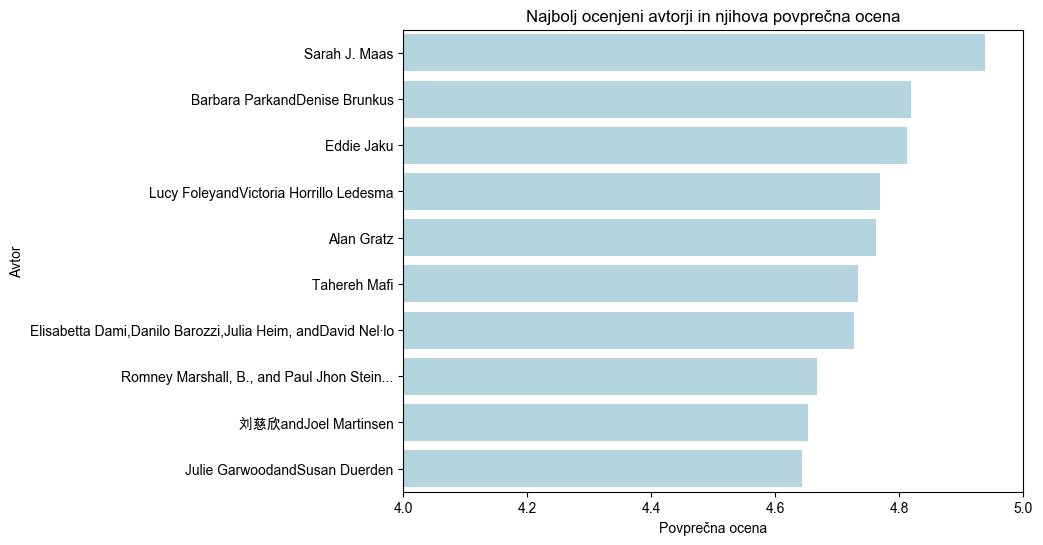

['Arial Unicode MS']

In [292]:
# Najbolje ocenjeni avtorji
top10_ocenjeni = povprecna_ocena_na_avtorja.head(10) # Vzamemo 10 avtorjev, z najvišjo povprečno oceno vseh knjig, ki jih je izdal/a

# Vrstični diagram
plt.figure(figsize=(8, 6))
sns.barplot(
    x = top10_ocenjeni.values,
    y = top10_ocenjeni.index,
    color="lightblue"
)
plt.title("Najbolj ocenjeni avtorji in njihova povprečna ocena")
plt.xlabel("Povprečna ocena")
plt.xlim(4, 5)
plt.ylabel("Avtor")
plt.show()

plt.rcParams['font.family'] # Nastavimo font, ki podpira CJK znake 

In [293]:
# Top 10 avtorjev na podlagi števila "Want to read"

avtorji_wtr = (
    knjige.groupby("avtor")["want_to_read"]
    .sum() #sešteje "want_to_read" vseh knjig avtorja
    .sort_values(ascending=False)
    )

top10_avtorji_wtr = avtorji_wtr.head(10)
top10_avtorji_wtr

avtor
Agatha Christie          8911
William Shakespeare      6076
Stephen King             6005
James Patterson          4277
Anne Rice                3966
Betty Neels              3719
Charles Dickens          3204
Brandon Sanderson        2900
Robert Lawrence Stine    2639
Albert Camus             2515
Name: want_to_read, dtype: int64

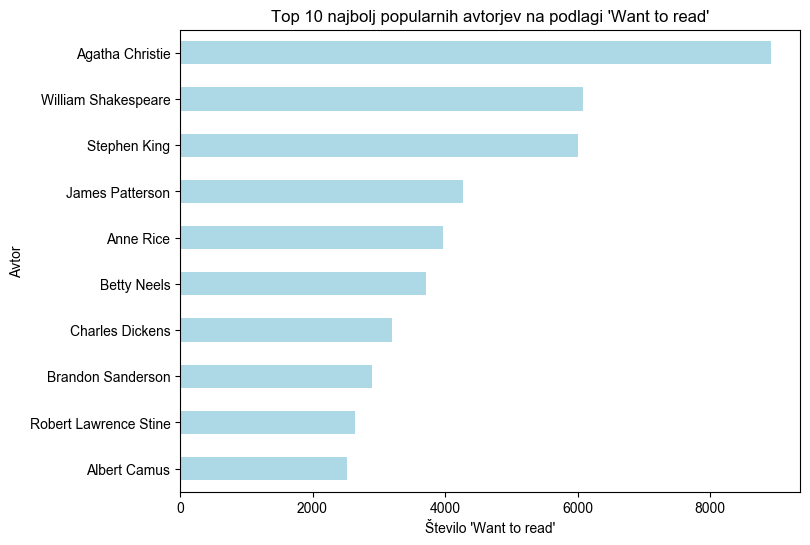

In [294]:
# Vrstični diagram najbolj popularnih avtorjev (na podlagi "want to read")

top10_avtorji_wtr.plot(kind = "barh", figsize=(8, 6), color = "lightblue") 
plt.title("Top 10 najbolj popularnih avtorjev na podlagi 'Want to read'") 
plt.xlabel("Število 'Want to read'") 
plt.ylabel("Avtor") 
plt.gca().invert_yaxis() # Nastavi najbolj popularne avtorje na vrh
plt.show()

Zdaj bomo analizirali še čas prvih izdaj knjig in kako vpliva na ocene knjig.
Analizirali bomo:
- število prvih izdaj na stoletje in desetletje (v zadnjih 100 letih),
- povprečno oceno knjig na stoletje in desetletje (v zadnjih 100 letih),
- povprečno oceno knjig v zadnjih 100 letih.

In [295]:

# Število prvih izdaj na stoletje
# vzamemo le knjige, za katere imamo podatke o letu prve izaje
knjige_veljavne1["stoletje"] = (((knjige_veljavne1["prva_izdaja"] - 1) // 100) + 1).astype(int)

# Dodamo lepo oznako (npr. "20. stoletje")
knjige_veljavne1["stoletje_oznaka"] = knjige_veljavne1["stoletje"].astype(str) + ". stoletje:"
knjige_na_stoletje = knjige_veljavne1["stoletje_oznaka"].value_counts().sort_index()

print(knjige_na_stoletje)

stoletje_oznaka
10. stoletje:       1
12. stoletje:       2
15. stoletje:      52
16. stoletje:     111
17. stoletje:     146
18. stoletje:     383
19. stoletje:    1455
20. stoletje:    5291
21. stoletje:    3344
Name: count, dtype: int64


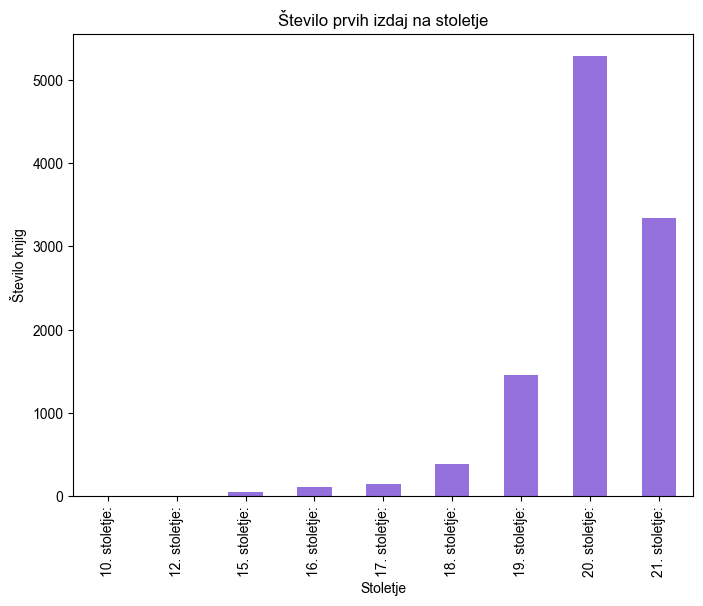

In [296]:
# Stolpični diagram prvih izdaj vsako stoletje
plt.figure(figsize=(8,6))
knjige_na_stoletje.plot(kind="bar", figsize = (8, 6), color = "mediumpurple")
plt.title("Število prvih izdaj na stoletje")
plt.xlabel("Stoletje")
plt.ylabel("Število knjig")
plt.show()

In [297]:
# Število prvih izdaj vsako desetletje (v zadnjih 100 letih)
trenutno_leto = pd.Timestamp.now().year

novejse_knjige1 = knjige[(knjige["prva_izdaja"] > trenutno_leto - 100) & (knjige["prva_izdaja"] > 0)].copy()
novejse_knjige1["desetletje"] = ((novejse_knjige1["prva_izdaja"] // 10) * 10).astype(int)

knjige_na_desetletje = novejse_knjige1["desetletje"].value_counts().sort_index()
knjige_na_desetletje

desetletje
1920     135
1930     316
1940     240
1950     340
1960     492
1970     586
1980     826
1990    1147
2000    1422
2010    1559
2020     536
Name: count, dtype: int64

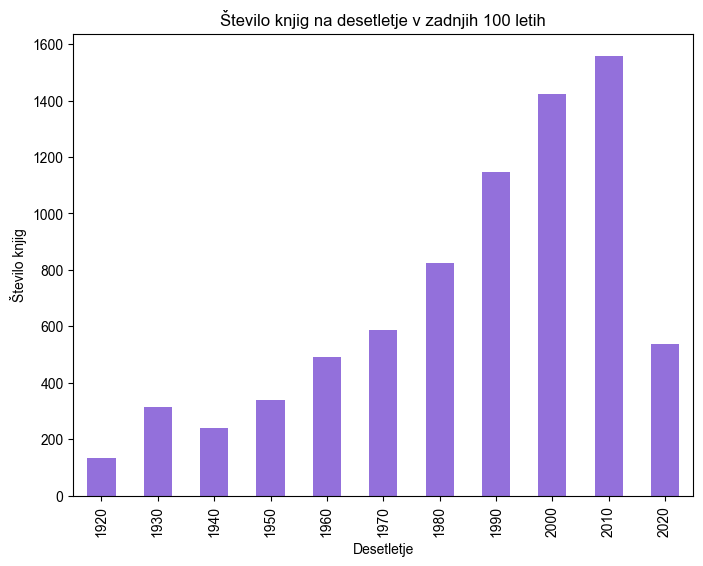

In [298]:
# Stolpični diagram prvih izdaj vsako desetletje (v zadnjem stoletju)
knjige_na_desetletje.plot(kind="bar", figsize=(8, 6), color = "mediumpurple")
plt.title("Število knjig na desetletje v zadnjih 100 letih")
plt.xlabel("Desetletje")
plt.ylabel("Število knjig")
plt.show()

Ugotovimo, da se število prvih izdaj knjig v zadnjih 50-ih letih povečuje, z izjemo leta 2020, kar sklepamo da je 
zaradi tega, ker podatki ne sežejo dlje kot do leta 2025 in hkrati morda novejše knjige še niso vnesene v spletni
strani.

In [299]:

# Povprečna ocena na stoletje

# Ponovno uporabimo le knjige, za katere imamo podatek o letu izdaje, le da sedaj
# hkrati upoštevamo, da morajo imeti knjige več kot 10 ocen, zato namesto "knjige",
# uporabimo "knjige_10", kar smo definirali že na začetku.
knjige_veljavne2 = knjige_10[knjige_10["prva_izdaja"] > 0].copy() 
knjige_veljavne2["stoletje"] = (((knjige_veljavne2["prva_izdaja"] - 1) // 100) + 1).astype(int)

# Dodamo lepo oznako kot prej
knjige_veljavne2["stoletje_oznaka"] = knjige_veljavne2["stoletje"].astype(str) + ". stoletje:"

povprecna_ocena_na_stoletje = (
    knjige_veljavne2
    .groupby(["stoletje", "stoletje_oznaka"])["ocena"]
    .mean()
    .round(2)
    .reset_index()
    .sort_values("stoletje")
    .loc[:, ["stoletje_oznaka", "ocena"]] # znebimo se oznake "stoletje", ki smo jo potrebovali za pravilen vrstni red
    .rename(columns={"stoletje_oznaka": "stoletje", "ocena" : "povprecna_ocena"})
)

print(povprecna_ocena_na_stoletje)


        stoletje  povprecna_ocena
0  12. stoletje:             3.94
1  15. stoletje:             3.82
2  16. stoletje:             3.76
3  17. stoletje:             3.76
4  18. stoletje:             3.80
5  19. stoletje:             3.90
6  20. stoletje:             3.96
7  21. stoletje:             4.04


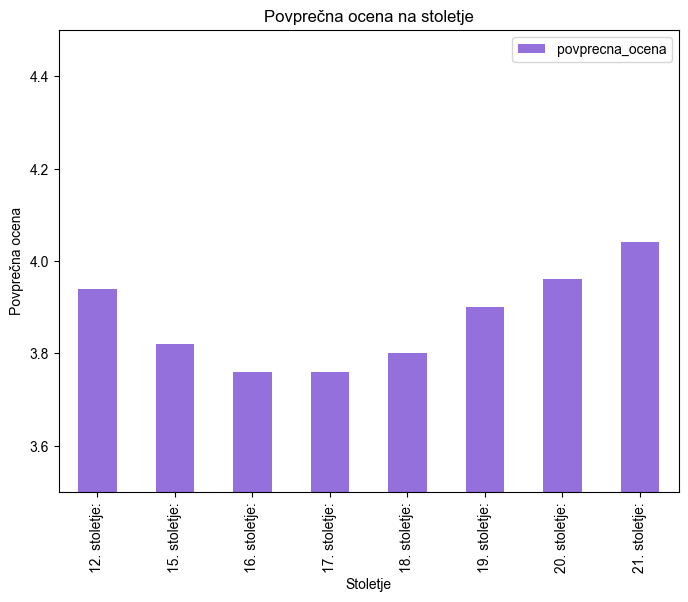

In [300]:
# Stolpični diagram povprečne ocene na stoletje (knjig z več kot 10 ocenami)

povprecna_ocena_na_stoletje.plot(
    x = "stoletje",
    y = "povprecna_ocena",
    kind = "bar",
    figsize=(8, 6), 
    color = "mediumpurple")
plt.title("Povprečna ocena na stoletje")
plt.xlabel("Stoletje")
plt.ylabel("Povprečna ocena")
plt.ylim(3.5, 4.5) # omejiti se moramo na dokaj majhen interval, saj so razlike dokaj minimalne
plt.show()

In [301]:
# Povprečna ocena na desetletje (v zadnjih 100 letih, knjig z več kot 10 ocenami)
trenutno_leto = pd.Timestamp.now().year
knjige_10 = knjige_10.copy()
novejse_knjige1 = knjige_10[(knjige_10["prva_izdaja"] > trenutno_leto - 100) & (knjige_10["prva_izdaja"] > 0)].copy()
novejse_knjige1["desetletje"] = ((novejse_knjige1["prva_izdaja"] // 10) * 10).astype(int) # desetletje napiše kot celo število
knjige_na_desetletje = novejse_knjige1["desetletje"].value_counts().sort_index()

povp_desetletje = novejse_knjige1.groupby("desetletje")["ocena"].mean()
povp_desetletje

desetletje
1920   4.11
1930   4.06
1940   4.02
1950   3.88
1960   3.99
1970   3.99
1980   3.93
1990   3.94
2000   4.02
2010   4.05
2020   4.17
Name: ocena, dtype: float64

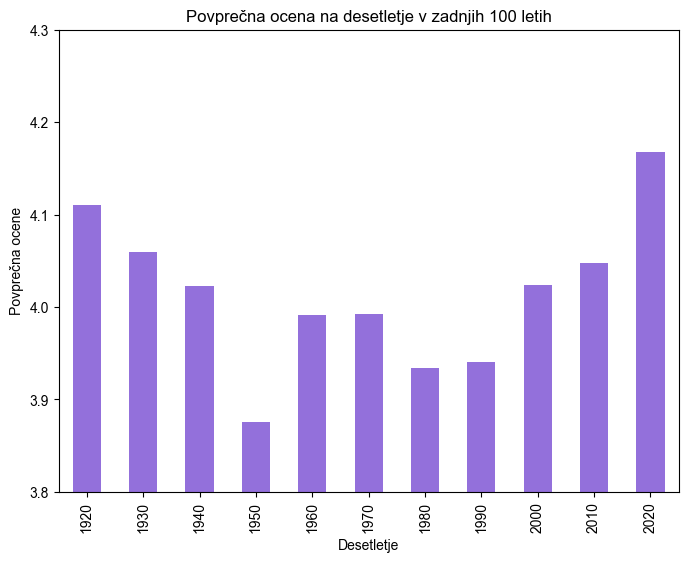

In [302]:
# Stolpični diagram povprečnih ocen na desetletje (v zadnjih 100 letih)
povp_desetletje.plot(kind = "bar", figsize = (8, 6), color = "mediumpurple")
plt.title("Povprečna ocena na desetletje v zadnjih 100 letih")
plt.xlabel("Desetletje")
plt.ylabel("Povprečna ocene")
plt.ylim(3.8, 4.3)
plt.show()

Opazimo da se skozi stoletja in desetletja povprečna ocena knjig nahaja med 3.7 in 4.2 in nimamo veliko odstopanj.

In [303]:
# Povprečne ocene knjig v zadnjih 100 letih
trenutno_leto = pd.Timestamp.now().year
knjige_10 = knjige_10.copy()

novejse_knjige1 = knjige_10[(knjige_10["prva_izdaja"] > trenutno_leto - 100) & (knjige_10["prva_izdaja"] > 0)].copy()
novejse_knjige1_povp = novejse_knjige1.groupby("prva_izdaja")["ocena"].mean().sort_index()
novejse_knjige1_povp

prva_izdaja
1926   4.18
1927   4.17
1928   3.97
1929   4.15
1930   4.00
       ... 
2018   4.00
2019   4.05
2020   4.19
2021   4.08
2022   4.37
Name: ocena, Length: 94, dtype: float64

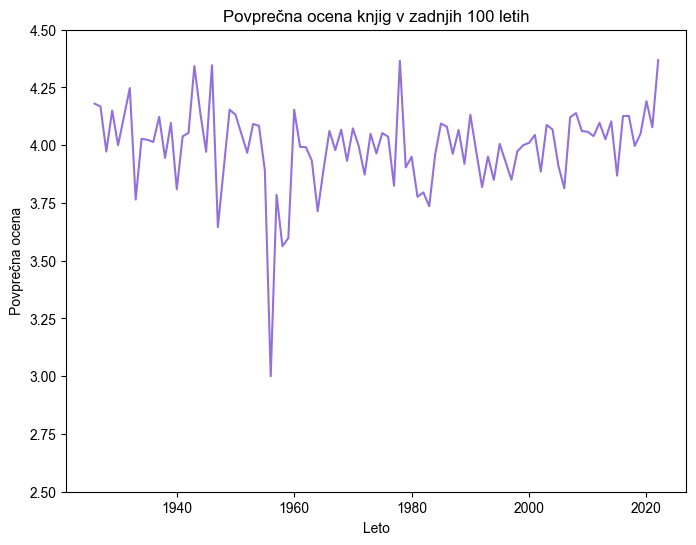

In [304]:
# Graf povprečnih ocen knjig v zadnjih 100 letih (knjig z več kot 10 ocenami)
novejse_knjige1_povp.plot(kind = "line", figsize = (8, 6), color = "mediumpurple")
plt.title("Povprečna ocena knjig v zadnjih 100 letih")
plt.xlabel("Leto")
plt.ylabel("Povprečna ocena")
plt.ylim(2.5, 4.5)
plt.show()



Opazimo, da se povprečna ocena knjig vsako leto nahaj nekje med 3.5 in 4.5, razen med letoma 1950 in 1960.

Za analizo so nam ostali še podatki o številu izdaj.
Pogledali si bomo:
- katere knjige imajo največje število izdaj (sklepamo, da bo večina teh knjig dokaj znanih),
- kako je število izdaj knjige odvisno od leta njene prve izdaje.

In [305]:
# Knjige z največjim številom izdaj
knjige_izdaje = knjige.sort_values("stevilo_izdaj", ascending = False)
knjige_izdaje.head(10)

,naslov,avtor,ocena,stevilo_ocen,want_to_read,prva_izdaja,stevilo_izdaj
263,Pride and Prejudice,Jane Austen,4.14,324,0,1813,4036
156,Alice's Adventures in Wonderland,Lewis Carroll,4.02,196,0,1865,3546
175,The Holy Bible: containing the Old and New Tes...,Bible,3.94,70,0,1200,3172
324,The picture of Dorian Gray,Oscar Wilde,4.11,105,0,1890,3005
187,Wuthering Heights,Emily Brontë,3.96,233,0,1846,2850
237,A Christmas Carol,Charles Dickens,3.95,92,592,1843,2727
264,Adventures of Huckleberry Finn,Mark Twain,3.83,212,939,1876,2552
85,Emma,Jane Austen,3.98,50,866,1815,2261
39,Oliver Twist,Charles Dickens,4.06,68,741,1822,2209
121,Frankenstein (Barnes & Noble Classics Series) ...,Mary Shelley,3.96,200,0,1818,2184


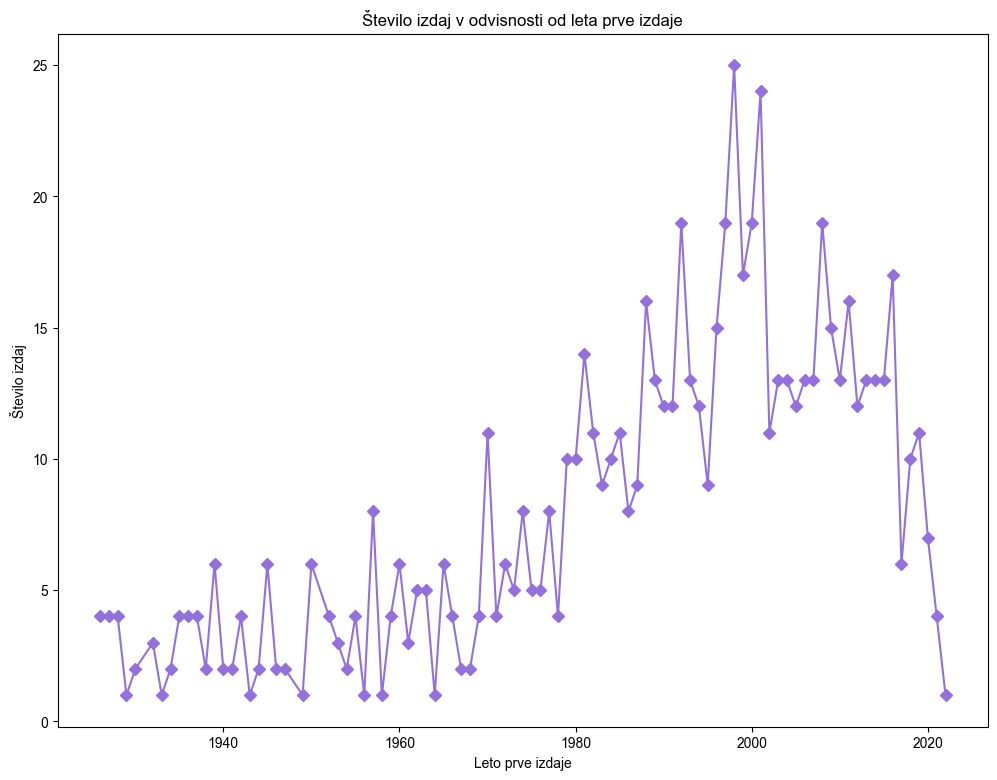

In [306]:
# Število izdaj v odvisnosti od leta izdaje (v zadnjih 100 letih)
izdaje_na_leto = novejse_knjige1.groupby("prva_izdaja").size()

plt.figure(figsize=(12, 9))
izdaje_na_leto.plot(kind="line", marker = "D", color = "mediumpurple")
plt.title("Število izdaj v odvisnosti od leta prve izdaje")
plt.xlabel("Leto prve izdaje")
plt.ylabel("Število izdaj")
plt.show()

Opazimo, da imajo največ izdaj dokaj novejše knjige, torej knjige napisane okoli leta 2000.

Analiziramo lahko tudi besede v naslovih knjig.
Iz naslovov knjig lahko izberemo besede, ki se v le-teh največkrat pojavijo in jih grafično prikažemo v obliki
"WordCloud-a".
Pri tem bomo odstranili besede, ki nimajo vsebinske vezanosti na naslove, kot so vezaji, predlogi,...

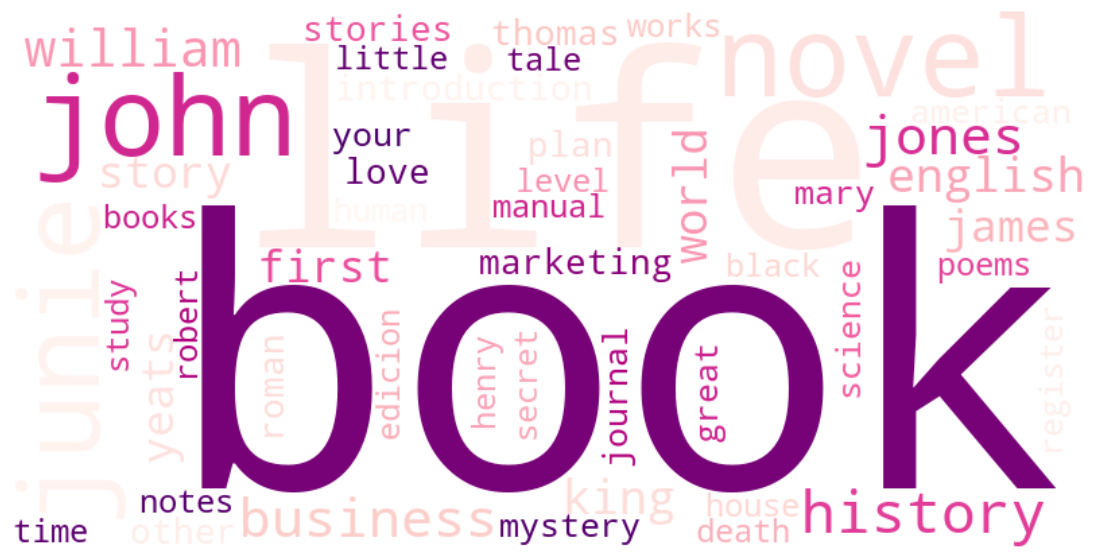

In [307]:
# Najpogostejše besede v naslovih knjig
from collections import Counter
import re
from wordcloud import WordCloud

# Odstranimo besede, kot so vezniki, predlogi in besede, ki se pogosto pojavijo v naslovih knjig, a ne nosijo 
# vsebinske informacije o knjigi same.

stop_besede = {"the", "and", "of", "in", "a", "an", "for", "to", "on", "with", "b2b",
                "volume", "part", "series", "edition", "laminated", "guide", "from"}
vse_besede = []

for naslov in knjige["naslov"]:
    besede = re.findall(r"\b[a-zčšž]+\b", str(naslov).lower())
    besede = [beseda for beseda in besede if beseda not in stop_besede and len(beseda) > 3] 
    # Predloge in veznike, ki jih prej nismo odstranili,
    # odstranimo sedaj, ko dodamo pogoj, da mora biti dolžina besede več kot 3. 
    vse_besede.extend(besede)

pojavitev_besed = Counter(vse_besede)
najbolj_pogoste_besede_v_naslovu = pojavitev_besed.most_common(20)

wordcloud = WordCloud(
    width = 800,
    height = 400,
    background_color= "white",
    colormap = "RdPu",
    max_words = 50
).generate_from_frequencies(pojavitev_besed)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

K analizi avtorjev lahko dodamo še "Heatmap" ocen 10-ih avtorjev, ki imajo največ knjig.
To bomo storili tako, da oblikujemo štiri razrede ocen in za vsakega izmed avtorjev, njegove knjige 
razvrstimo v te razrede in nato preštejemo, koliko knjig ima v posameznem razredu.
Grafično to nato prikažemo s tabelo.

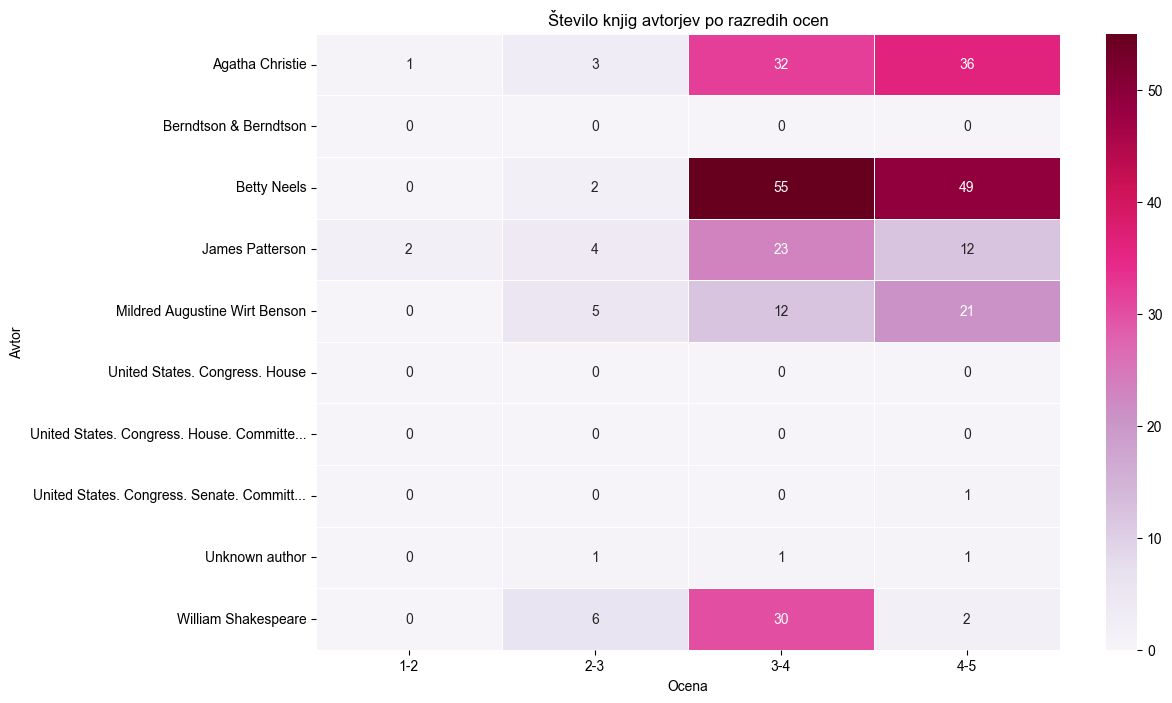

In [308]:
# Število knjig avtorjev v odvisnosti od povprečne ocene avtorjev
ocene = [1, 2, 3, 4, 5] # meje za razrede ocen
oznake = ["1-2", "2-3", "3-4", "4-5"] # imena razredov, ki bodo prikazana na grafu

top10_avtorjev = st_knjig_na_avtorja.head(10).index

knjige_top10 = knjige[knjige["avtor"].isin(top10_avtorjev)].copy() # Vzamemo knjige top 10 avtorjev

# Ocene knjig razporedimo v razrede
knjige_top10["razredi_ocen"] = pd.cut(
    knjige_top10["ocena"],
    bins = ocene,
    labels = oznake,
    include_lowest = True)

# Naredimo tabelo, ki prikaže število knjig vsakega avtorja v posameznem razredu ocen
ocene_knjig_avtorjev_count = knjige_top10.pivot_table(
    index = "avtor",
    columns="razredi_ocen",
    values ="naslov",
    aggfunc = "count",
    fill_value = 0,
    observed=False
)

plt.figure(figsize=(12,8))
sns.heatmap(ocene_knjig_avtorjev_count, cmap="PuRd", linewidths=0.5, annot=True, fmt="d")
plt.title("Število knjig avtorjev po razredih ocen")
plt.xlabel("Ocena")
plt.ylabel("Avtor")
plt.show()


S pomočjo naših podatkov o knjigah bomo sedaj poiskali 10 najbolj precenjenih knjig in 10 najbolj podcenjenih knjig.
To bomo storili tako, da bomo najprej napisali metriko, ki nam bo pomagala določiti, katere knjige so precenjene in katere podcenjene.
V izračunu bodo le knjige z dovolj visoko oceno, oziroma knjige z nizko oceno bodo ustrezno "kaznovane"
Vsaki knjigi bomo priredili število "want to read" in oceno in od prvega odšteli drugo, saj naša metrika meri razliko med željo po branju in dejansko oceno.
Tako bomo dobili mero precenjenosti za vsako knjigo, na podlagi katere bomo knjige umestili med precenjene oz. podcenjene.
Precenjene bodo knjige z visoko mero precenjenosti, podcenjene pa z nizko.
Dobljene podatke bomo nato prikazali v tabeli in grafično.

In [309]:
# Top 10 najbolj overrated knjig

# Vzamemo samo knjige, ki imajo podatke o številu "want to read"
knjige_nonzero_wtr = knjige_10[knjige_10["want_to_read"] > 0].copy()

# Shranimo povprečno oceno vseh knjig, ki jo bomo uporabljali za referenco pri določanju precenjenosti
povprecje_vseh = knjige_nonzero_wtr["ocena"].mean()

# Metrika za določanje knjig, ki so precenjene

knjige_nonzero_wtr["prilagojena_ocena"] = (knjige_nonzero_wtr["ocena"] - knjige_nonzero_wtr["ocena"].min()) / \
                                          (knjige_nonzero_wtr["ocena"].max() - knjige_nonzero_wtr["ocena"].min())

knjige_nonzero_wtr["prilagojen_wtr"] = (knjige_nonzero_wtr["want_to_read"] - knjige_nonzero_wtr["want_to_read"].min()) / \
                                       (knjige_nonzero_wtr["want_to_read"].max() - knjige_nonzero_wtr["want_to_read"].min())


# Izračun metrike precenjenosti
knjige_nonzero_wtr["mera_precenjenosti"] = knjige_nonzero_wtr["prilagojen_wtr"] - knjige_nonzero_wtr["prilagojena_ocena"]

# Top 10 najbolj precenjenih
top_over = knjige_nonzero_wtr.sort_values("mera_precenjenosti", ascending=False).head(10)

# Potrebni podatki za prikaz tabel
podatki_over = top_over[["naslov", "avtor", "ocena", "stevilo_ocen", "want_to_read", "mera_precenjenosti"]].copy()
podatki_over["ocena"] = podatki_over["ocena"].round(2)
podatki_over["mera_precenjenosti"] = podatki_over["mera_precenjenosti"].round(2)

# Top 10 najbolj podcenjenih
top_under = knjige_nonzero_wtr.sort_values("mera_precenjenosti", ascending=True).head(10)

# Potrebni podatki za prikaz tabel
podatki_under = top_under[["naslov", "avtor", "ocena", "stevilo_ocen", "want_to_read", "mera_precenjenosti"]].copy()
podatki_under["ocena"] = podatki_under["ocena"].round(2)
podatki_under["mera_precenjenosti"] = podatki_under["mera_precenjenosti"].round(2)

In [310]:
# Tabela top 10 precenjenih knjig
podatki_over

,naslov,avtor,ocena,stevilo_ocen,want_to_read,mera_precenjenosti
1775,Culpa nuestra,Mercedes Ron,3.25,24,762,0.54
755,Gone Girl,Gillian Flynn,3.64,55,934,0.54
233,The Scarlet Letter,Nathaniel Hawthorne,3.23,103,733,0.52
269,Heart of darkness,Joseph Conrad,3.52,119,841,0.50
801,Influence: how and why people agree to things,Robert B. Cialdini,3.92,59,990,0.47
1108,The Artist's Way,Julia CameronandAda Arbós Bo,3.25,16,687,0.46
264,Adventures of Huckleberry Finn,Mark Twain,3.83,212,939,0.45
83,Secret Garden. Livello B1. 1. Con CD-ROM,Frances Hodgson Burnett,3.89,75,935,0.42
254,La guerra de los mundos,H. G. Wells,3.83,144,881,0.40
377,Cinquante nuances plus sombres: roman,E. L. James,3.42,36,694,0.40


In [311]:
# Tabela top 10 podcenjenih knjig
podatki_under

,naslov,avtor,ocena,stevilo_ocen,want_to_read,mera_precenjenosti
929,Junie B. Jones Is a Party Animal (Junie B. Jon...,Barbara ParkandDenise Brunkus,4.82,11,71,-0.88
1727,"Mistborn Trilogy: The Final Empire, the Well o...",Brandon Sanderson,4.91,11,119,-0.87
1940,Fantasia: Het Vlammenravijn,"Elisabetta Dami,Danilo Barozzi,Julia Heim, and...",4.73,11,73,-0.84
1957,Arcanum Unbounded: The Cosmere Collection: the...,Brandon Sanderson,4.69,16,58,-0.83
4697,Dios Tullido. Malaz X,Steven Erikson,4.57,14,23,-0.82
1056,Empire of Storms (B&N Exclusive Edition) (Thro...,Sarah J. Maas,4.94,16,200,-0.80
3003,Ring in a Teacup,Betty Neels,4.55,11,24,-0.80
1619,Secreto / The Secret,Julie GarwoodandSusan Duerden,4.64,14,75,-0.80
3962,Doblan Por los Mastines,Steven Erikson,4.53,15,29,-0.79
2299,No longer a dream,Carole Mortimer,4.57,14,49,-0.79


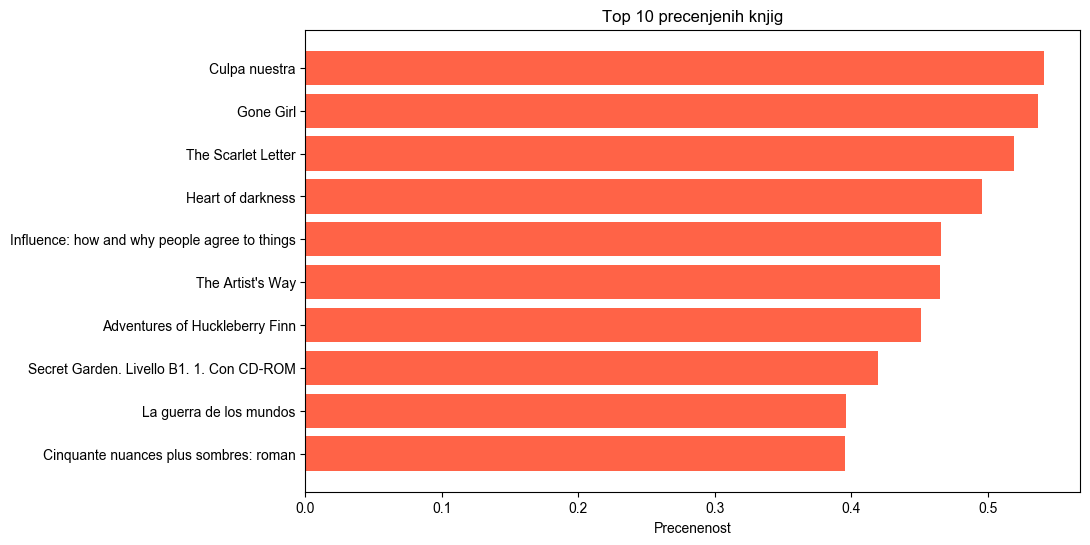

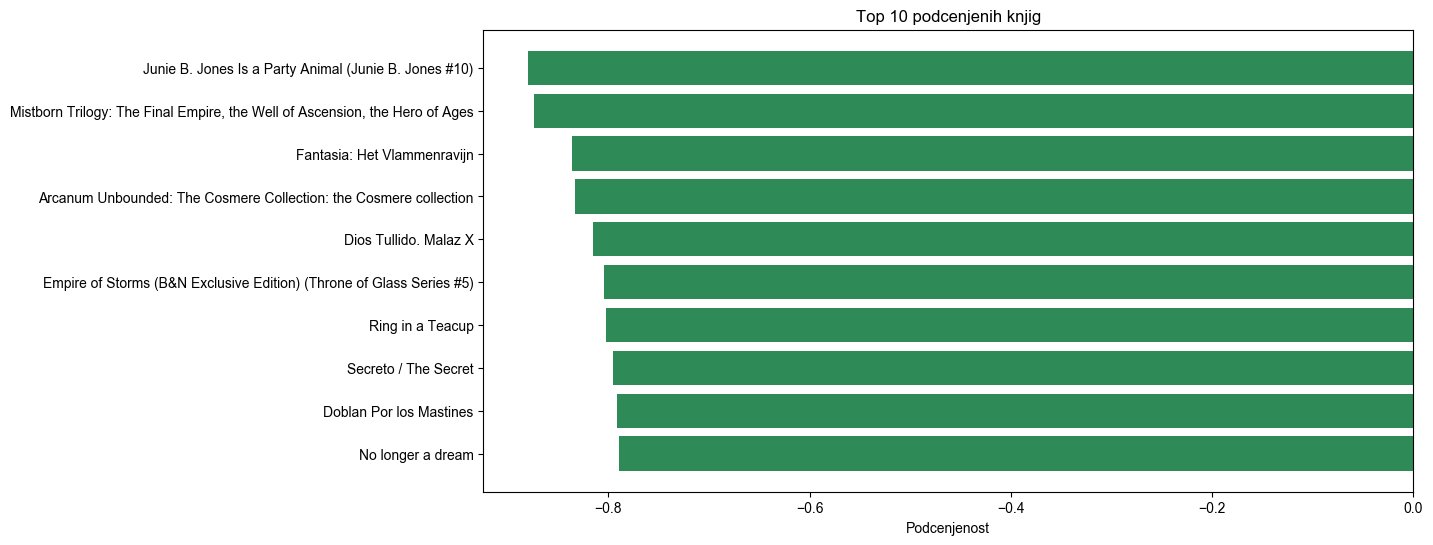

In [312]:
# Vrstični diagram najbolj precenjenih knjig po meri precenjenosti
plt.figure(figsize=(10,6))
plt.barh(top_over["naslov"], top_over["mera_precenjenosti"], color="tomato")
plt.title("Top 10 precenjenih knjig")
plt.xlabel("Precenenost")
plt.gca().invert_yaxis()
plt.show()

# Vrstični diagram najbolj podcenjenih knjig po meri precenjenosti
plt.figure(figsize=(12,6))
plt.barh(top_under["naslov"], top_under["mera_precenjenosti"], color="seagreen")
plt.title("Top 10 podcenjenih knjig")
plt.xlabel("Podcenjenost")
plt.gca().invert_yaxis()
plt.show()

Z uporabo prej definirane metrike, ki smo jo uporabili že pri iskanju precenjenih in podcenjenih knjig, sedaj lahko nadgradimo analizo avtorjev, tako da poiščeno še najbolj precenjene in najbolj podcenjene avtorje.
To storimo tako, da izračunamo mero precenjenosti vsakega izmed avtorjev, na podlagi povprečne mere precenjenosti njegovih knjig.
Podatke nato grafično prikažemo s tabelo in vrstičnim diagramom.

In [313]:
# Najbolj overrated avtorji in najbolj underrated avtorji

# Mera precenjenosti za vsakega avtorja
avtorji_metrika = knjige_nonzero_wtr.groupby("avtor")["mera_precenjenosti"].mean().reset_index()
top10_overrated_avtorjev = avtorji_metrika.sort_values("mera_precenjenosti", ascending = False).head(10)
top10_underrated_avtorjev = avtorji_metrika.sort_values("mera_precenjenosti", ascending = True).head(10)

top10_overrated_avtorjev["mera_precenjenosti"] = top10_overrated_avtorjev["mera_precenjenosti"].round(2)
top10_underrated_avtorjev["mera_precenjenosti"] = top10_underrated_avtorjev["mera_precenjenosti"].round(2)

In [314]:
# Precenjeni avtorji
top10_overrated_avtorjev

,avtor,mera_precenjenosti
184,Gillian Flynn,0.54
403,Robert B. Cialdini,0.47
280,Julia CameronandAda Arbós Bo,0.46
161,Frances Hodgson Burnett,0.42
336,Mercedes Ron,0.39
416,Rupi Kaur,0.38
181,"Gerard J. Tortora,Bryan H. Derrickson,Brendan ...",0.33
133,E. L. James,0.32
448,Stephenie MeyerandStephenie Meyer,0.31
274,Joseph Heller,0.30


In [315]:
# Podcenjeni avtorji
top10_underrated_avtorjev

,avtor,mera_precenjenosti
45,Barbara ParkandDenise Brunkus,-0.88
143,"Elisabetta Dami,Danilo Barozzi,Julia Heim, and...",-0.84
425,Sarah J. Maas,-0.80
282,Julie GarwoodandSusan Duerden,-0.80
135,Eddie Jaku,-0.74
351,Mo Willems,-0.72
172,Garth Nix,-0.72
353,N. K. Jemisin,-0.72
460,"Terry Pratchett,Ian Stewart,Jack Cohen,Ian Ste...",-0.72
237,Jean Craighead George,-0.70


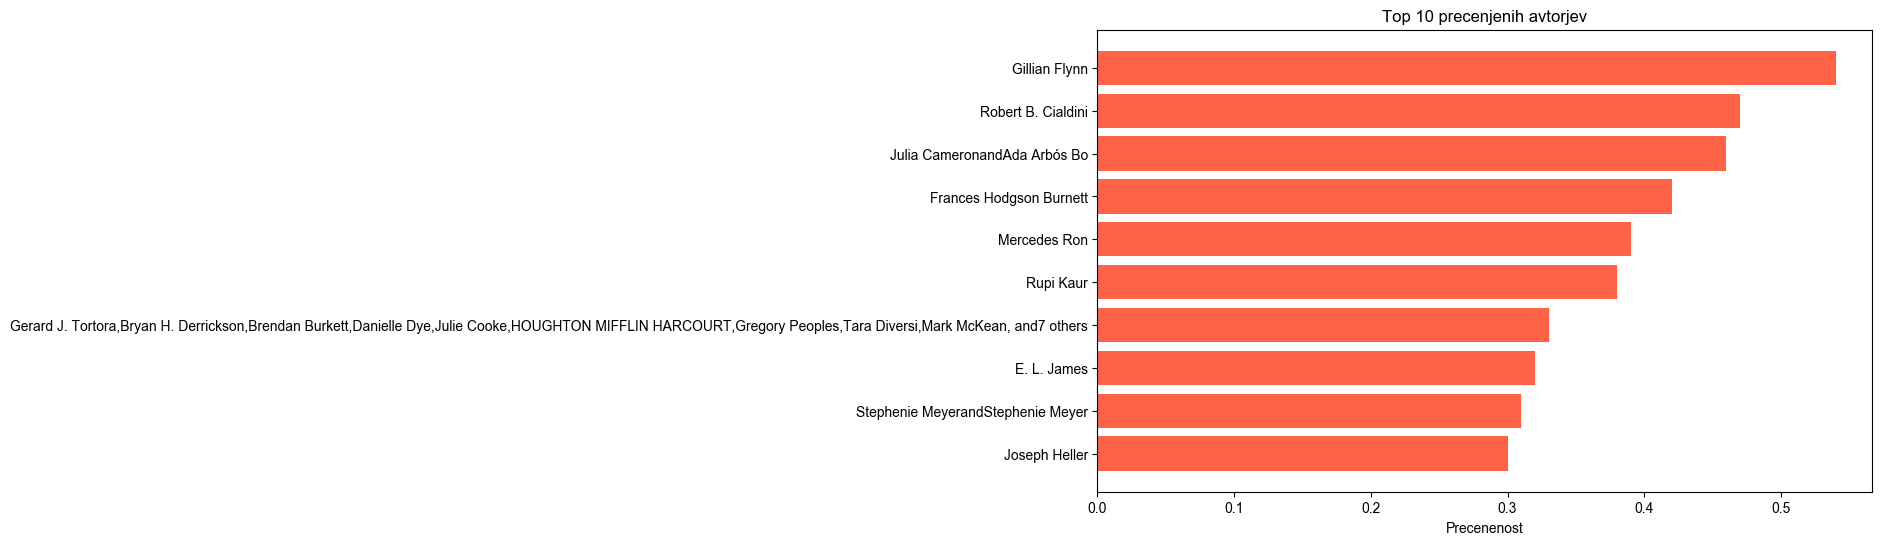

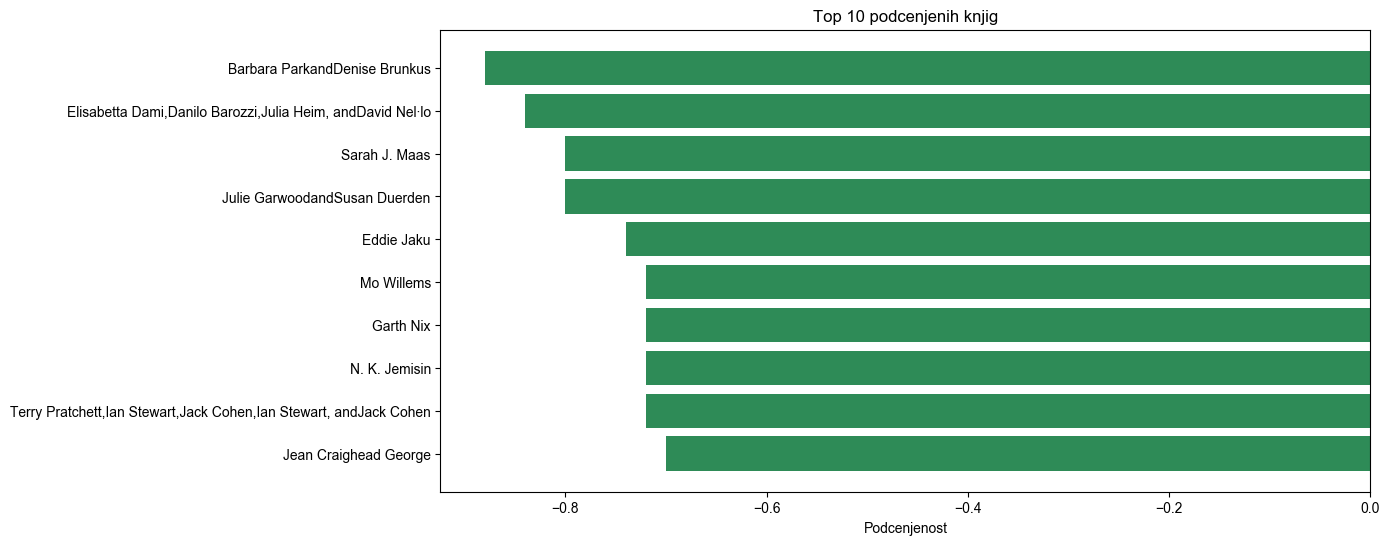

In [316]:
# Vrstični diagram najbolj precenjenih avtorjev po meri precenjenosti
plt.figure(figsize=(10,6))
plt.barh(top10_overrated_avtorjev["avtor"], top10_overrated_avtorjev["mera_precenjenosti"], color="tomato")
plt.title("Top 10 precenjenih avtorjev")
plt.xlabel("Precenenost")
plt.gca().invert_yaxis()
plt.show()

# Vrstični diagram najbolj podcenjenih avtorjev po meri precenjenosti
plt.figure(figsize=(12,6))
plt.barh(top10_underrated_avtorjev["avtor"], top10_underrated_avtorjev["mera_precenjenosti"], color="seagreen")
plt.title("Top 10 podcenjenih knjig")
plt.xlabel("Podcenjenost")
plt.gca().invert_yaxis()
plt.show()

Napišemo lahko tudi metriko za top 10 knjig, ki so najbolj vredne branja.
Želimo dobiti knjige, ki imajo dovolj visoko oceno in hkrati dovolj veliko ocen, da so ocene "accurate".

Za vsako knjigo izračunamo metriko "vredne_branja", ki nam bo povedala, ali je knjiga vredna branja.
Vzamemo logaritemsko funkcijo log(1 + n), ki preprečuje, da bi knjige z ogromnim številom ocen vedno prevladale in nato
to pomnožimo z oceno knjige, kar poskrbi, da so visoko ocenjene knjige "prednostno uvrščene".

In [317]:
# Top 10 knjig najbolj vrednih branja

import numpy as np

# Izračun metrike
knjige_10["vredne_branja"] = knjige["ocena"] * np.log1p(knjige["stevilo_ocen"])
top10_vrednih_branja = knjige_10.sort_values("vredne_branja", ascending = False).head(10)

# Prikaz v tabeli
podatki_vredne = top10_vrednih_branja[["naslov", "avtor", "ocena", "stevilo_ocen", "want_to_read", "vredne_branja"]].copy()
podatki_vredne["ocena"] = podatki_vredne["ocena"].round(2)
podatki_vredne["vredne_branja"] = podatki_vredne["vredne_branja"].round(2)

podatki_vredne


,naslov,avtor,ocena,stevilo_ocen,want_to_read,vredne_branja
657,De 48 wetten van de macht,Robert Greene,4.04,1027,0,28.05
38,"Rich Dad, Poor Dad B Special",Robert T. KiyosakiandSharon L. Lechter,4.00,1001,0,27.66
235,Harry Potter and the Prisoner of Azkaban,J. K. Rowling,4.27,583,0,27.21
220,The Hobbit,J.R.R. Tolkien,4.28,462,0,26.26
46,El juego de Ender,Orson Scott Card,4.36,388,991,25.98
251,Animal Farm,George Orwell,4.14,515,0,25.83
337,Harry Potter and the Chamber of Secrets,J. K. Rowling,4.20,435,0,25.55
292,Harry Potter und die Heiligtümer des Todes,J. K. Rowling,4.28,391,0,25.55
99,The Hunger Games,Suzanne Collins,4.10,460,0,25.16
479,El Marciano,Andy Weir,4.38,306,745,25.10


Ogledamo si lahko še, kako se ocene knjig avtorjev spreminjajo skozi čas.
Za začetek lahko napišemo le funkcijo, ki nam pokaže kako so se ocene 5-ih najbolje ocenejnih novejših avtorjev (avtorjev, ki so pisali od leta 2000 dalje), spreminjajo skozi čas.

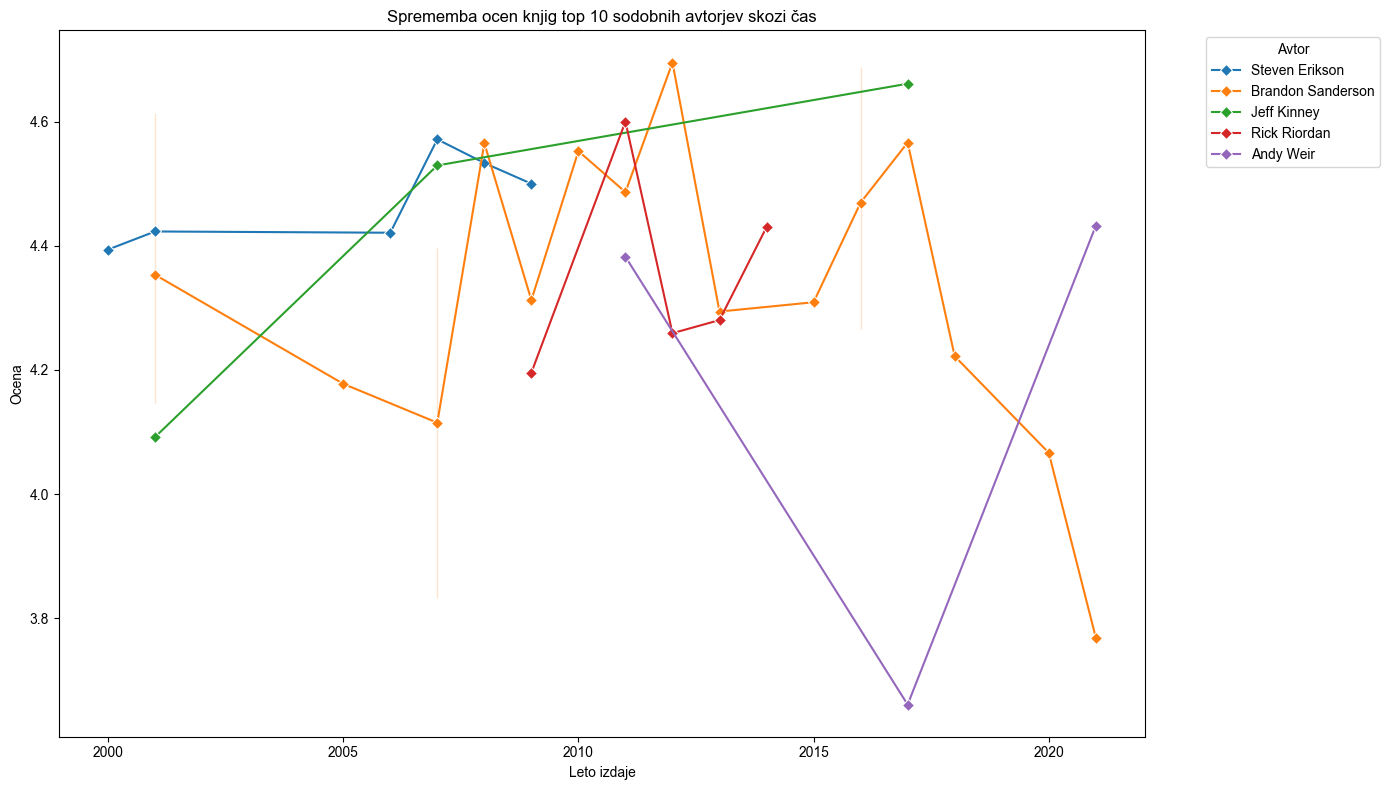

In [318]:
# Spreminjanje ocen knjig top 5 najbolje ocenjenih novejših avtorjev skozi čas
knjige_novejse = knjige_10[knjige_10["prva_izdaja"] >= 2000].copy()

# Izberemo avtorje z vsaj tremi knjigami
st_knjig_avtorja = knjige_novejse["avtor"].value_counts()
veljavni_avtorji = st_knjig_avtorja[st_knjig_avtorja >= 3].index
knjige_novejse = knjige_novejse[knjige_novejse["avtor"].isin(veljavni_avtorji)]

# Izberemo top 10 avtorjev, ki ustrezajo prejšnjim kriterijem
povprecje_avtorjev = knjige_novejse.groupby("avtor")["ocena"].mean()
top10_sodobnih_avtorjev = povprecje_avtorjev.sort_values(ascending = False).head(5).index
knjige_top10_avtorjev = knjige_novejse[knjige_novejse["avtor"].isin(top10_sodobnih_avtorjev)]

# Knjige razvrstimo po letu izdaje
knjige_top10_avtorjev = knjige_top10_avtorjev.sort_values(by = "prva_izdaja")

# Narišemo grafe s pridobljenimi podatki
plt.figure(figsize = (14, 8))
sns.lineplot(data = knjige_top10_avtorjev, x = "prva_izdaja", y = "ocena", hue = "avtor", marker = "D")
plt.title("Sprememba ocen knjig top 10 sodobnih avtorjev skozi čas")
plt.xlabel("Leto izdaje")
plt.ylabel("Ocena")
plt.legend(title = "Avtor", bbox_to_anchor = (1.05, 1), loc = "upper left")
plt.tight_layout()
plt.show()

Sedaj pa napišemo funkcijo, ki nam prav tako grafično prikaže, kako se ocene knjig avtorjev spreminjajo skozi čas, le da bomo sedaj vzeli podatke za 50 avtorjev z največjim številom knjig z več kot 3 ocenami, naša funkcija pa bo izrisala graf, ki nam pokaže, kako so se ocene knjig izbranega avtorja skozi čas spreminjale.

In [319]:
# Leto izdaje in ocena knjig avtorjev z več kot tremi ocenami

import ipywidgets as widgets
from ipywidgets import interact

# Top 50 avtorjev po številu knjig z več kot 3 ocenami:
knjige_3 = knjige[knjige["stevilo_ocen"] > 3]
st_knjig_na_avtorja = knjige_3["avtor"].value_counts()
top50_avtorjev = st_knjig_na_avtorja.head(50).index.tolist()

def graf_za_avtorja(avtor):
    podatki = knjige_3[knjige_3["avtor"] == avtor].sort_values("prva_izdaja")

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=podatki, x = "prva_izdaja", y = "ocena", marker = "D")
    plt.title(f"Ocene skozi čas avtorja {avtor}")
    plt.xlabel("Leto izdaje")
    plt.ylabel("Ocena")
    plt.ylim(1, 5)
    plt.show()

interact(graf_za_avtorja, avtor=widgets.Dropdown(options=top50_avtorjev, description="Avtor:"))


interactive(children=(Dropdown(description='Avtor:', options=('Betty Neels', 'Agatha Christie', 'William Shake…

<function __main__.graf_za_avtorja(avtor)>